# Fourth Hands-On Session
---
- Energy effects: intruducing dispersion
---

The following exercises might not be addressed during the course, but we encourage you to explore them after the course.
They are examples that show how one can extend our simple tools to investigate and better understand more complex systems.

In [1]:
# Import custom tracking functions and useful libraries
from tracking_library import *

# Set up plotting
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (15, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
plt.rcParams.update(params)

## Introducing 3x3 elements

In order to consider energy effects we need to introduce at least $3\times3$ matrices for drift space, quadrupoles, and sector dipoles, where the third coordinate corresponds to the particle energy deviation $\mathrm{d}p/p_0$. Recall [Wolfgan's lecture](https://indico.cern.ch/event/1356988/contributions/5713241/):
 
<p align="center">
<img src=./_img_exercises/slide_3x3matrices.png width="60%">
</p>

- **These elements are already provided in our `tracking_library` toolbox:**

In [2]:
from tracking_library import B3, D3, Q3

help(D3)
help(Q3)
help(B3)

Help on function <lambda> in module tracking_library:

<lambda> lambda L
    # The drift as a sequence of a single tuple

Help on function <lambda> in module tracking_library:

<lambda> lambda f
    # The quadrupole

Help on function <lambda> in module tracking_library:

<lambda> lambda phi, l
    # The sector bend



### Exercise 25

Setting the scene: build a beam line of 6 FODO cells (e.g., L_cell = 4 m) with a phase advance of 60 degrees/cell (using 3x3 thin quadrupoles just introduced). 
Add a sector bending magnet (3x3 version) with length 1 m and bending angle $\phi=10$ degrees in the center of each drift. 
At this point, it is not too important where you start your FODO cell.

Verify nothing changes with respect to the same beamline made of 2x2 matrices.

- **Note:** You may have to play with the quadrupole focal length to make the phase advance close to 60 degrees. You should have done this in earlier exercises. 

#### SOLUTION

In [3]:
# building up the 3x3 case
n_cells = 6
f = 2.26085
l_cell = 4
l_dipole = 1
l_drift = (l_cell - l_dipole * 2) / 4
phi = 10 * np.pi / 180
fodo_cell = (
    Q3(f)
    + 3 * D3(l_drift / 3)
    + B3(phi, l_dipole)
    + 3 * D3(l_drift / 3)
    + Q3(-f)
    + 3 * D3(l_drift / 3)
    + B3(phi, l_dipole)
    + 3 * D3(l_drift / 3)
)
fodo_lattice = n_cells * fodo_cell
phase, beta, alpha, gamma = twiss(fodo_cell)
tune = n_cells * phase
print(
    f"""
The 3x3 phase per cell is: {phase}
The 3x3 beta is: {beta} m
The 3x3 alpha is: {alpha} 
The 3x3 gamma is: {gamma}
"""
)


The 3x3 phase per cell is: 0.16666742254599543
The 3x3 beta is: 6.402756913976354 m
The 3x3 alpha is: -1.4160065714170231 
The 3x3 gamma is: 0.4693407309805126



In [4]:
# repeating for 2x2 case
fodo_cell_2x2 = (
    Q(f)
    + 3 * D(l_drift / 3)
    + B(phi, l_dipole)
    + 3 * D(l_drift / 3)
    + Q(-f)
    + 3 * D(l_drift / 3)
    + B(phi, l_dipole)
    + 3 * D(l_drift / 3)
)
phase, beta, alpha, gamma = twiss(fodo_cell_2x2)
print(
    f"""
The 2x2 phase per cell is: {phase}
The 2x2 beta is: {beta} m
The 2x2 alpha is: {alpha} 
The 2x2 gamma is: {gamma}
"""
)


The 2x2 phase per cell is: 0.16666742254599543
The 2x2 beta is: 6.402756913976354 m
The 2x2 alpha is: -1.4160065714170231 
The 2x2 gamma is: 0.4693407309805126



### Exercise 26

Consider the previously defined beamline (3x3 case).
Use the starting conditions $(x_0,x_0',\delta)=(0,0,0)$ and plot the position along the beam line. Repeat this for $\delta=10^{-3}$ and for $\delta=3\times 10^{-3}$. Plot all three traces in the same graph. Discuss what you observe and explain.

#### SOLUTION

Text(0, 0.5, 'x [mm]')

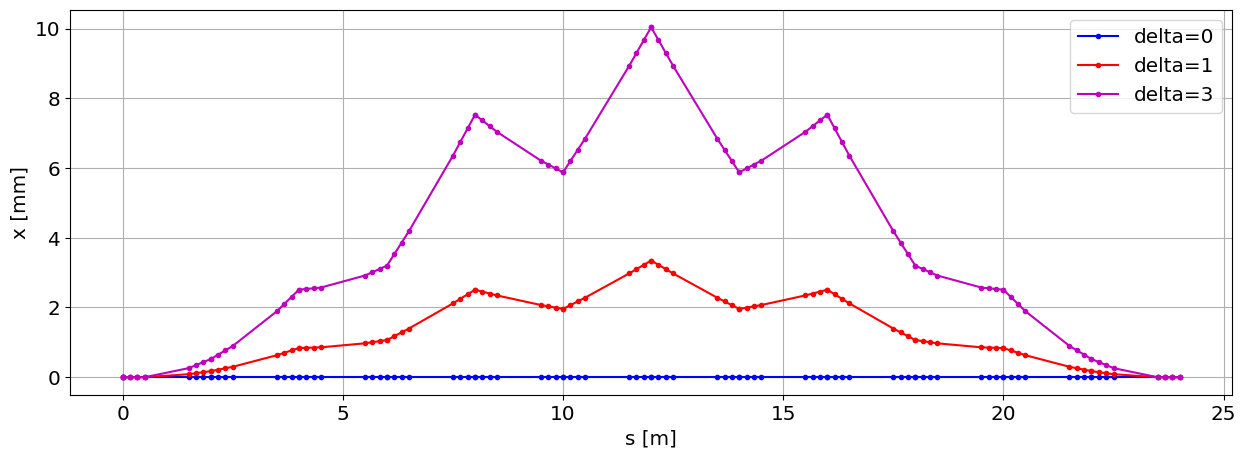

In [5]:
# tracking
for delta, color in zip([0, 1, 3], ["b", "r", "m"]):
    beam = np.array([[0], [0], [delta]])
    transported_particles = transportParticles(beam, fodo_lattice)
    plt.plot(transported_particles["s"], transported_particles["x"], ".-" + color, label=f"delta={delta}")

plt.legend()
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("x [mm]")

### Exercise 27
Work out the transverse components of the periodic beam matrix $\sigma_0$. Assume that the geometrical emittance is $\epsilon_0=10^{-6}$ m rad. Furthermore, assume that the momentum spread $\sigma_0(3,3)=\sigma_p^2$ is zero and plot the beam size along the beam line.

#### SOLUTION

In [6]:
epsilon_0 = 1e-6
sigma_p_2 = 0
sigma_0 = epsilon_0 * np.array([[beta, -alpha, 0], [-alpha, gamma, 0], [0, 0, sigma_p_2]])

Text(0.5, 0, 's [m]')

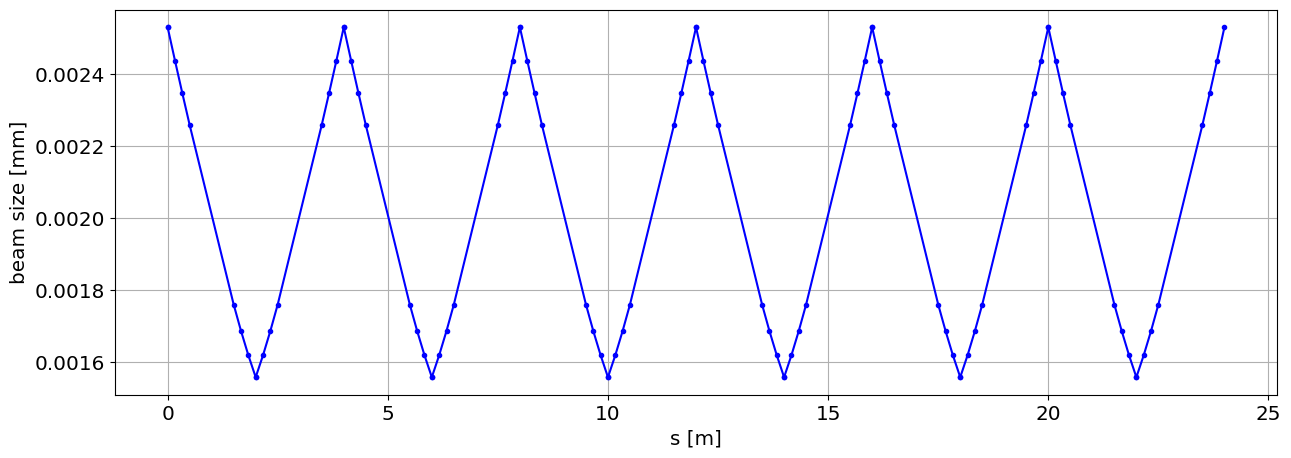

In [7]:
transported_sigmas = transportSigmas(sigma_0, fodo_lattice)
plt.plot(transported_sigmas["s"], np.sqrt(transported_sigmas["sigma11"]), ".-b")
plt.grid(True)
plt.ylabel("beam size [mm]")
plt.xlabel("s [m]")

### Exercise 28
Plot the beam size for for $\sigma_p^2=10^{-3}$ and for $\sigma_p^2=3\times 10^{-3}$. What happens if you change the phase advance of the cell? Try out by slightly changing the focal lengths.

#### SOLUTION

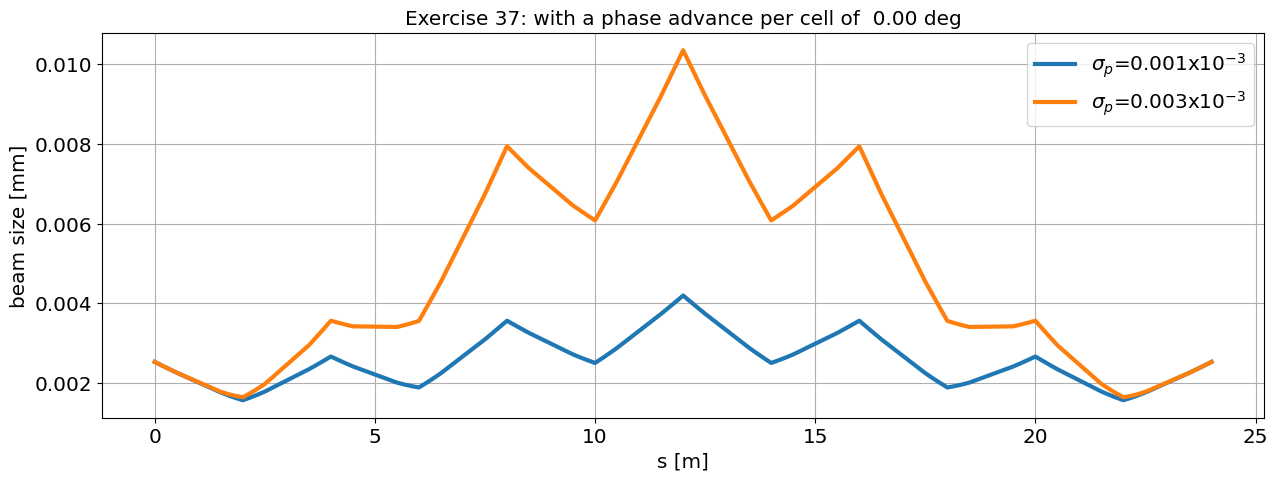

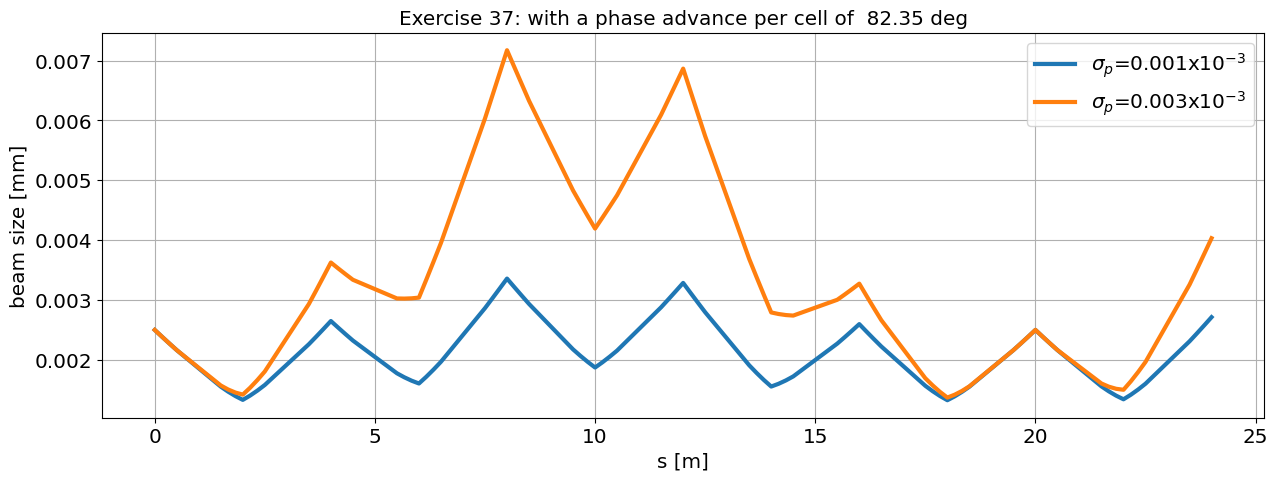

In [8]:
l_cell = 4
l_dipole = 1
l_drift = (l_cell - l_dipole * 2) / 4
phi = 20 * np.pi / 360

for f in (2.26085, 1.8):
    plt.figure()
    fodo_lattice = (
        Q3(f)
        + 3 * D3(l_drift / 3)
        + B3(phi, l_dipole)
        + 3 * D3(l_drift / 3)
        + Q3(-f)
        + 3 * D3(l_drift / 3)
        + B3(phi, l_dipole)
        + 3 * D3(l_drift / 3)
    )
    beamline = 6 * fodo_lattice
    tune, beta, alpha, gamma = twiss(beamline)

    for sigma_p in [1e-3, 3e-3]:
        sigma_p_2 = (sigma_p) ** 2
        sigma_0 = epsilon_0 * np.array([[beta, -alpha, 0], [-alpha, gamma, 0], [0, 0, sigma_p_2 / epsilon_0]])
        transported_sigmas = transportSigmas(sigma_0, 6 * fodo_lattice)
        plt.plot(transported_sigmas["s"], np.sqrt(transported_sigmas["sigma11"]), label=f"$\sigma_p$={sigma_p}x$10^{{-3}}$", lw=3)

    plt.grid(True)
    plt.ylabel("beam size [mm]")
    plt.xlabel("s [m]")
    plt.title(f"Exercise 37: with a phase advance per cell of {tune*2*180: 3.2f} deg")
    plt.legend(loc="best")

### Exercise 29

Determine the periodic dispersion at the start of the cell. Then plot the dispersion in the cell.

#### SOLUTION

For that we need to find the *real* periodic solution of the 3x3 one turn matrix

In [9]:
OTM = getEquivalentElement(beamline)
eigenvalues, eigenvectors = np.linalg.eig(OTM[0]["matrix"])
print(eigenvalues)
print(eigenvectors[:, 2])

[0.13306447+0.99110738j 0.13306447-0.99110738j 1.        +0.j        ]
[0.75524936+0.j 0.20979149+0.j 0.62095567+0.j]


Note that the third eigenvalue is real, i.e. is associated to a real eigenvector, which is our solution:

In [10]:
dispersion = np.real(eigenvectors[:, 2] / eigenvectors[2, 2])
print(dispersion)

[1.21626937 0.3378526  1.        ]


Sanity check: one can see that indeeed is a periodic solution!

In [11]:
OTM[0]["matrix"] @ dispersion

array([1.21626937, 0.3378526 , 1.        ])

And track it along our lattice:

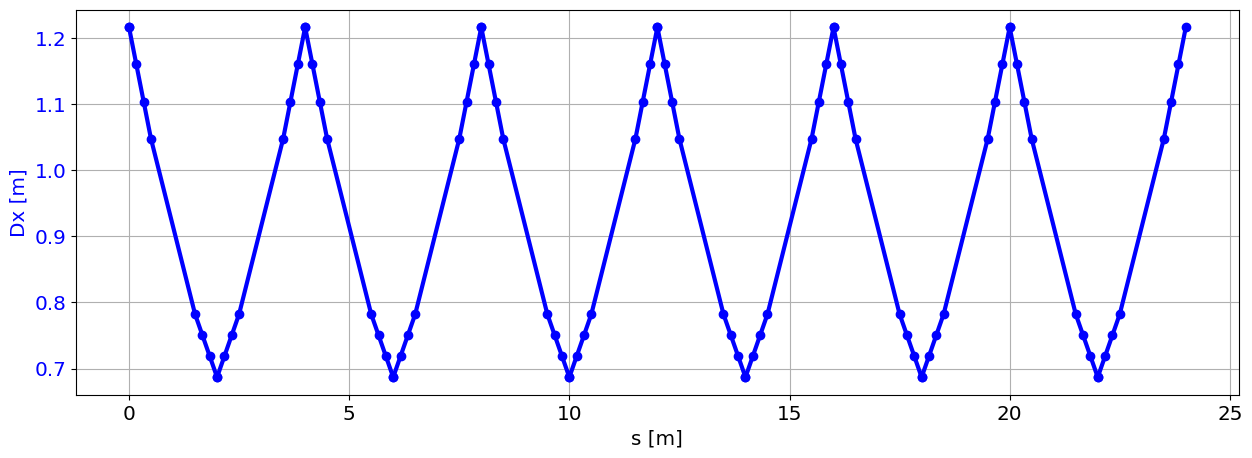

In [12]:
# need to make dispersion array compatible with our transportParticles function
dispersion = np.reshape(dispersion, (3, 1))
transported_particles = transportParticles(dispersion, beamline)

plt.plot(transported_particles["s"], transported_particles["x"], "o-b", lw=3)
plt.grid(True)
plt.xlabel("s [m]")
plt.ylabel("Dx [m]", color="b")
plt.tick_params(axis="y", labelcolor="b")

## Well done !!

=> **If you still have time, continue your learning with the following [notebook](./05_4D_Systems.ipynb)**...